# Pytorch 数据读取&Torvision使用&卷积

## PyTorch 中的数据读取

In [4]:
# Dataset
import torch
from torch.utils.data import Dataset

class MyDataset(Dataset):
    def __init__(self, data_tensor, target_tensor):
        self.data_tensor = data_tensor
        self.target_tensor = target_tensor
    
    def __len__(self):
        return self.data_tensor.size(0)
    
    def __getitem__(self, index):
        return self.data_tensor[index], self.target_tensor[index]

In [5]:
data_tensor = torch.randn(10,3)
target_tensor = torch.randint(2,(10,))

my_dataset = MyDataset(data_tensor, target_tensor)
print(len(my_dataset))
print(my_dataset[3])

10
(tensor([0.8685, 0.0133, 1.1630]), tensor(0))


In [6]:
# DataLoader
from torch.utils.data import DataLoader
tensor_dataloader = DataLoader(dataset = my_dataset,
                              batch_size = 2,
                              shuffle = 2,
                              num_workers =0)

for data, target in tensor_dataloader:
    print(data, target)
    
print("one batch:", iter(tensor_dataloader).next())

tensor([[-2.1601,  0.4595,  0.6937],
        [ 0.2111,  1.6439,  0.3351]]) tensor([0, 1])
tensor([[-1.0566,  0.0154,  1.7713],
        [ 0.8719,  0.7853,  0.3223]]) tensor([1, 0])
tensor([[-0.2782, -1.5485,  1.2719],
        [-0.1457, -0.8181, -0.9222]]) tensor([1, 0])
tensor([[ 0.8685,  0.0133,  1.1630],
        [ 0.7853, -0.4559,  0.5755]]) tensor([0, 1])
tensor([[-0.1976, -0.5653,  0.3282],
        [ 1.0198, -0.7940,  1.2801]]) tensor([1, 1])
one batch: [tensor([[-0.1976, -0.5653,  0.3282],
        [ 0.2111,  1.6439,  0.3351]]), tensor([1, 1])]


## Torchvision

In [8]:
# 读取 mnist数据集
import torchvision
mnist_dataset = torchvision.datasets.MNIST(root='../data',
                                          train=True,
                                          transform=None,
                                          target_transform=None,
                                          download=True)

100.0%


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100.0%


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100.0%


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100.0%


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [10]:
mnist_data_list = list(mnist_dataset)
print(mnist_data_list)

display(mnist_data_list[0][0])
print("Image label is:", mnist_data_list[0][1])

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Image label is: 5


In [12]:
from PIL import Image
from torchvision import transforms

img = Image.open('../data/img/smile.jped')
#display(img)
print(type(img))

img1 = transforms.ToTensor()(img)
print(type(img1))

img2 = transforms.ToPILImage()(img1)
print(type(img2))

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'torch.Tensor'>
<class 'PIL.Image.Image'>


/data/miniconda3/envs/py39_torch_cpu/lib/python3.9/site-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


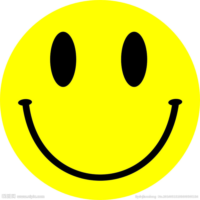

In [13]:
#Resize
resize_img_oper = transforms.Resize((200,200), interpolation=2)
img3 = resize_img_oper(img)
display(img3)

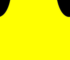

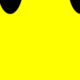

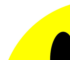

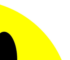

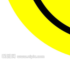

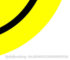

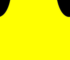

In [14]:
# 裁剪
centor_crop_oper = transforms.CenterCrop((60,70))
random_crop_oper = transforms.RandomCrop((80,80))
five_crop_oper = transforms.FiveCrop((60,70))

img4 = centor_crop_oper(img3)
display(img4)
img5 = random_crop_oper(img3)
display(img5)
imgs6 = five_crop_oper(img3)
for img in imgs6:
    display(img)

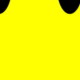

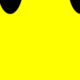

In [19]:
# 翻转
h_flip_oper = transforms.RandomHorizontalFlip(p=0.8)
v_flip_oper = transforms.RandomVerticalFlip(p=0.5)

img7 = h_flip_oper(img5)
display(img7)
img8 = v_flip_oper(img5)
display(img8)

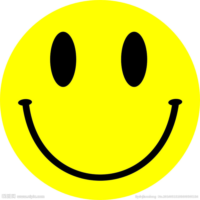

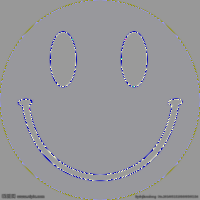

In [22]:
# 标准化
norm_oper =transforms.Normalize((0.2,0.2,0.2), (0.5,0.5,0.5))

img_tensor = transforms.ToTensor()(img3)
tensor_norm = norm_oper(img_tensor)
display(img3)

img_norm = transforms.ToPILImage()(tensor_norm)
display(img_norm)

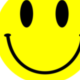

In [23]:
# 组合
composed = transforms.Compose([transforms.Resize((100,100)),transforms.RandomCrop(80) ])

img11 = composed(img3)
display(img11)

In [24]:

from torchvision import transforms
from torchvision import datasets

# 定义一个transform
my_transform = transforms.Compose([transforms.ToTensor(),
                                   transforms.Normalize((0.5), (0.5))
                                  ])
# 读取MNIST数据集 同时做数据变换
mnist_dataset = datasets.MNIST(root='../data',
                               train=False,
                               transform=my_transform,
                               target_transform=None,
                               download=True)

# 查看变换后的数据类型
item = mnist_dataset.__getitem__(0)
print(type(item[0]))
'''
输出：
<class 'torch.Tensor'>
'''

<class 'torch.Tensor'>


"\n输出：\n<class 'torch.Tensor'>\n"

In [25]:

import torch
import torchvision.models as models

# 加载预训练模型
googlenet = models.googlenet(pretrained=True)

# 提取分类层的输入参数
fc_in_features = googlenet.fc.in_features
print("fc_in_features:", fc_in_features)

# 查看分类层的输出参数
fc_out_features = googlenet.fc.out_features
print("fc_out_features:", fc_out_features)

# 修改预训练模型的输出分类数(在图像分类原理中会具体介绍torch.nn.Linear)
googlenet.fc = torch.nn.Linear(fc_in_features, 10)
'''
输出：
fc_in_features: 1024
fc_out_features: 1000
'''

/data/miniconda3/envs/py39_torch_cpu/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/data/miniconda3/envs/py39_torch_cpu/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /usr/local/app/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100.0%


fc_in_features: 1024
fc_out_features: 1000


'\n输出：\nfc_in_features: 1024\nfc_out_features: 1000\n'

torch.Size([32, 1, 28, 28])


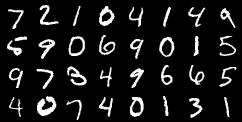

In [26]:

import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

# 加载MNIST数据集
mnist_dataset = datasets.MNIST(root='../data',
                               train=False,
                               transform=transforms.ToTensor(),
                               target_transform=None,
                               download=True)
# 取32张图片的tensor
tensor_dataloader = DataLoader(dataset=mnist_dataset,
                               batch_size=32)
data_iter = iter(tensor_dataloader)
img_tensor, label_tensor = data_iter.next()
print(img_tensor.shape)
'''
输出：torch.Size([32, 1, 28, 28])
'''
# 将32张图片拼接在一个网格中
grid_tensor = torchvision.utils.make_grid(img_tensor, nrow=8, padding=2)
grid_img = transforms.ToPILImage()(grid_tensor)
display(grid_img)

In [27]:

# 输入为一张图片的tensor 直接保存
torchvision.utils.save_image(grid_tensor, '../data/img/grid.jpg')

# 输入为List 调用grid_img函数后保存
torchvision.utils.save_image(img_tensor, '../data/img/grid2.jpg', nrow=5, padding=2)

## Pytorch中的卷积

In [37]:
import torch
import torch.nn as nn

input_feat = torch.tensor([[4, 1, 7, 5], [4, 4, 2, 5], [7, 7, 2, 4], [1, 0, 2, 4]], dtype=torch.float32)
print(input_feat)
print(input_feat.shape)

conv2d = nn.Conv2d(1,1, (2,2),stride=1, padding='same', bias=True)
# 默认情况随机初始化参数
print(conv2d.weight)
print(conv2d.bias)

tensor([[4., 1., 7., 5.],
        [4., 4., 2., 5.],
        [7., 7., 2., 4.],
        [1., 0., 2., 4.]])
torch.Size([4, 4])
Parameter containing:
tensor([[[[0.0671, 0.3086],
          [0.4891, 0.2789]]]], requires_grad=True)
Parameter containing:
tensor([-0.0304], requires_grad=True)


In [38]:

conv2d = nn.Conv2d(1, 1, (2, 2), stride=1, padding='same', bias=False)
# 卷积核要有四个维度(输入通道数，输出通道数，高，宽)
kernels = torch.tensor([[[[1, 0], [2, 1]]]], dtype=torch.float32)
conv2d.weight = nn.Parameter(kernels, requires_grad=False)
print(conv2d.weight)
print(conv2d.bias)


Parameter containing:
tensor([[[[1., 0.],
          [2., 1.]]]])
None


In [39]:
input_feat =input_feat.unsqueeze(0).unsqueeze(0)
print(input_feat.shape)

torch.Size([1, 1, 4, 4])


/data/miniconda3/envs/py39_torch_cpu/lib/python3.9/site-packages/torch/nn/modules/conv.py:453: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at  /opt/conda/conda-bld/pytorch_1656352482743/work/aten/src/ATen/native/Convolution.cpp:882.)
  return F.conv2d(input, weight, bias, self.stride,


In [40]:
output = conv2d(input_feat)

##### 深度可分离卷积（Depthwise Separable Convolution）

In [42]:

import torch
import torch.nn as nn

# 生成一个三通道的5x5特征图
x = torch.rand((3, 5, 5)).unsqueeze(0)
print(x.shape)
# 输出：
torch.Size([1, 3, 5, 5])
# 请注意DW中，输入特征通道数与输出通道数是一样的
in_channels_dw = x.shape[1]
out_channels_dw = x.shape[1]
# 一般来讲DW卷积的kernel size为3
kernel_size = 3
stride = 1
# DW卷积groups参数与输入通道数一样
dw = nn.Conv2d(in_channels_dw, out_channels_dw, kernel_size, stride, groups=in_channels_dw)

#PW

in_channels_pw = out_channels_dw
out_channels_pw = 4
kernel_size_pw = 1
pw = nn.Conv2d(in_channels_pw, out_channels_pw, kernel_size_pw, stride)
out = pw(dw(x))
print(out.shape)

torch.Size([1, 3, 5, 5])
torch.Size([1, 4, 3, 3])
